# Companies do not get punished for their data breach incidents!

#### The following information is derived from the'Information Is Beautiful' data set.

In [1]:
import pandas as pd
import csv
csv_data1 = pd.read_csv('CSVClean.csv')

#### Querying the Ticker symbols of the companies in the dataset and creating a CSV document

In [2]:
import pandas_datareader.data as web
import requests
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def getTickerSymbol(company):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(company)
    result = requests.get(url).json() 
    for resultEntry in result['ResultSet']['Result']:
        if fuzz.token_sort_ratio(resultEntry['name'], company) > 60:
            return resultEntry['symbol']
        
tickerSymbolList = list()
for index, row in csv_data1.iterrows():
    tickersymbol = getTickerSymbol(row['Entity'])
    tickerSymbolList.append(tickersymbol)

C:\Users\kulka\JupyterNotebooks\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
csv_data2 = csv_data1.copy()
tickerSymbolColumnList = pd.Series(tickerSymbolList)
csv_data2['Ticker_Symbol'] = tickerSymbolColumnList.values
csv_data2.dropna(thresh=None, inplace=True)
csv_data2['Year'].replace(to_replace='Latest',value='2017', inplace=True)

#### Cleaning the columns in the dataset and binding the set to the desired timeline

In [5]:
tickerSymbolList_Updated = csv_data2['Ticker_Symbol'].tolist()
import datetime
import pandas_datareader.data as web
startDate  = datetime.datetime(2004, 1, 1)
endDate = datetime.datetime(2017, 10, 31)
stockprice = web.DataReader(tickerSymbolList_Updated, 'yahoo', startDate, endDate)

C:\Users\kulka\JupyterNotebooks\pandas_datareader\yahoo\daily.py:136: SymbolWarning: Failed to read symbol: 'CIT-U.TI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\kulka\JupyterNotebooks\pandas_datareader\yahoo\daily.py:136: SymbolWarning: Failed to read symbol: 'HPQFF8.EX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\kulka\JupyterNotebooks\pandas_datareader\yahoo\daily.py:136: SymbolWarning: Failed to read symbol: 'SBUX-USD.SW', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\kulka\JupyterNotebooks\pandas_datareader\yahoo\daily.py:136: SymbolWarning: Failed to read symbol: '^UMIAMIFL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\kulka\JupyterNotebooks\pandas_datareader\yahoo\daily.py:136: SymbolWarning: Failed to read symbol: 'JPM-PB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\kulka\JupyterNotebooks\pandas_datareader\yahoo\d

In [6]:
tickerSymbolTable = pd.DataFrame(tickerSymbolList_Updated) 
tickerSymbolTable['Ticker_Symbol'] = pd.Series(tickerSymbolList_Updated, index=tickerSymbolTable.index)

In [7]:
tickerSymbolTable = tickerSymbolTable.drop(tickerSymbolTable.columns[0], axis=1)

In [10]:
closingPrice = stockprice.ix['Close']
businessDays = pd.date_range(start=startDate, end=endDate, freq='B')
closingPrice = closingPrice.reindex(businessDays)
closingPrice.to_csv (index=False)

'AAPL,ADP,ANTM,CIT-U.TI,CPWFF8.EX,CYH,DGX,DIP.DU,DNPLY,EBAY,EFX,FB,FIS,FLINGX,GPN,GPS,HD,HLAN,HPQFF8.EX,JAPSY,JPM-PB,KCT.V,LYNS,NDAQ,NTDOY,SBUX-USD.SW,SJ8.MU,SPLS,T,TWTR,VOD,YAHOY,^CEXY,^UMIAMIFL\n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n1.52,31.690842,38.139998999999996,,,22.272728,36.125,,13.875,13.257576,23.969998999999998,,32.939999,,11.8825,22.530001000000002,35.02,36.363636,,,,,,9.25,11.9,,,17.5,26.139999,,29.485946999999996,,,\n1.5835709999999998,32.626656,36.855,,,22.314049,36.25,,14.5,13.598485,24.200001,,33.939999,,12.17,22.610001,35.029999,36.363636,,,,,,8.75,11.9,,,17.507,27.049999,,30.650940000000002,,,\n1.577857,32.935951,37.055,,,21.801652999999998,36.505001,,14.7,13.712121,24.49,,33.599998,,12.4,23.1,35.41,36.363636,,,,,,8.8,12.1,,,17.372999,27.120001000000002,,31.116936,,,\n1.6135709999999999,32.761478000000004,37.25,,,21.446281,36.814999,,14.55,13.720539000000002,24.040001,,33.549999,,12.265,23.0,35.900002,36.363636,,,,,,8.75,11.85,,,17.92,27.1,,31.000436999999998,,,\n1.668

In [11]:
closingPrice = closingPrice.dropna(axis=1,how='all')
closingPrice = closingPrice.T
stockHistoryTable = pd.DataFrame(columns=['Ticker_Symbol','Date','Closing_Price'])
k = 0
for i in range(25) : 
    tickerSymbol = closingPrice.index[i]
    for j in range(3609): 
        datesIntervals = pd.to_datetime(str(closingPrice.columns.values[j]))
        date = datesIntervals.strftime('%Y-%m-%d')
        stockHistoryTable.loc[k] = (tickerSymbol,  date , closingPrice.iloc[i][j])
        k = k + 1

In [12]:
stockHistoryTable.to_csv('StockHistoryTableLatest.csv',index = True)
stockHistoryData = stockHistoryTable.copy()
stockHistoryData.dropna(axis=0, how='all')

,Ticker_Symbol,Date,Closing_Price
0,AAPL,2004-01-01,NaN
1,AAPL,2004-01-02,1.520000
2,AAPL,2004-01-05,1.583571
3,AAPL,2004-01-06,1.577857
4,AAPL,2004-01-07,1.613571
5,AAPL,2004-01-08,1.668571
6,AAPL,2004-01-09,1.642857
7,AAPL,2004-01-12,1.695000
8,AAPL,2004-01-13,1.722857
9,AAPL,2004-01-14,1.728571


In [15]:
stockHistoryData.dropna(subset=['Closing_Price'], inplace=True) 

In [16]:
stockHistoryData.to_csv('stockHistoryDataLatestClean1.csv',index = True)

### In the previous Lab session -

#### I supported the claim that the Financial Markets do not punish data breaches. However, I could point some improvements in the visualizations that supported my claim. The focus of my visualizations was Vodafone and Anthem since I considered these as valid warrants to support my claim. However, I realised that I could illustrate one more entity to bolster my claim. 

#### In the Vodafone and Anthem Stock prices trends, I intended to showcase the stock price of the companies and focus on their growth trend. However, I realised that in order to make a better comparison for performance of the companies, I shoud also plot the market trend (other companies in the datasets). This would help align the overall financial impacts on all the companies and ensure fair comparison.

#### In the Data Breach timelines, I researched the exact time when the data breaches occured and highlighted them on the timelines respectively. I still stand by my thought process on this. However, it does not help me visually compare with the company's performance around the time of the data breach easily.

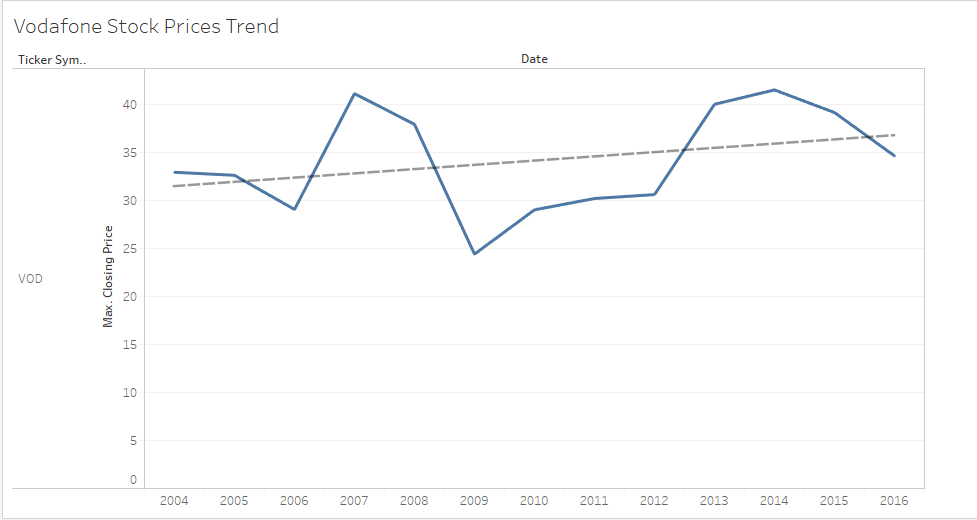

In [17]:
from IPython.display import Image
Image("LS7-FinalVod1.png")

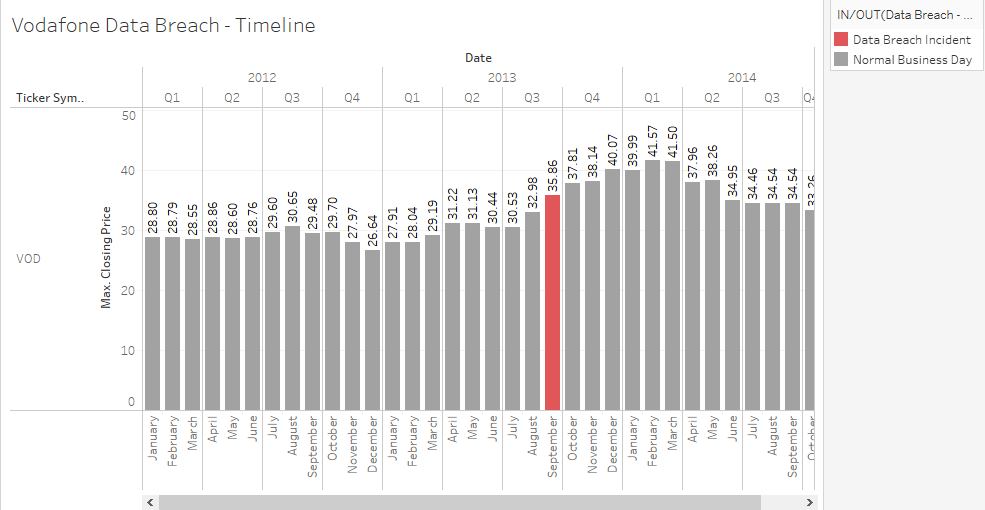

In [18]:
from IPython.display import Image
Image("LS7-FinalVod2.png")

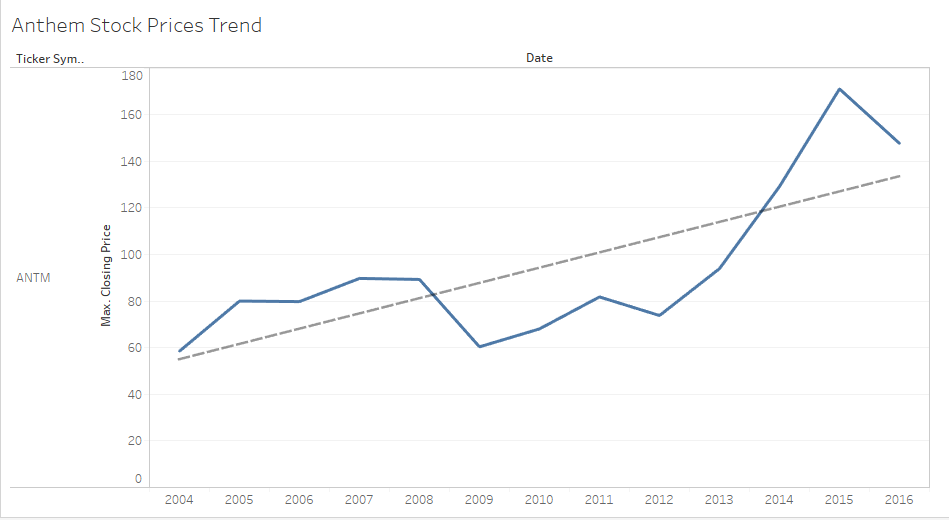

In [19]:
from IPython.display import Image
Image("LS7-FinalAnthem1.png")

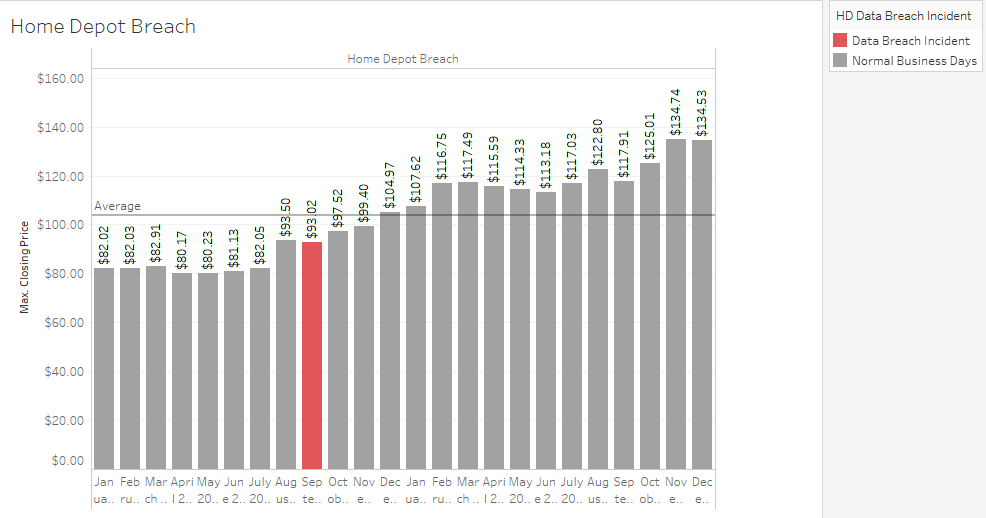

In [22]:
from IPython.display import Image
Image("LS7-1.png")

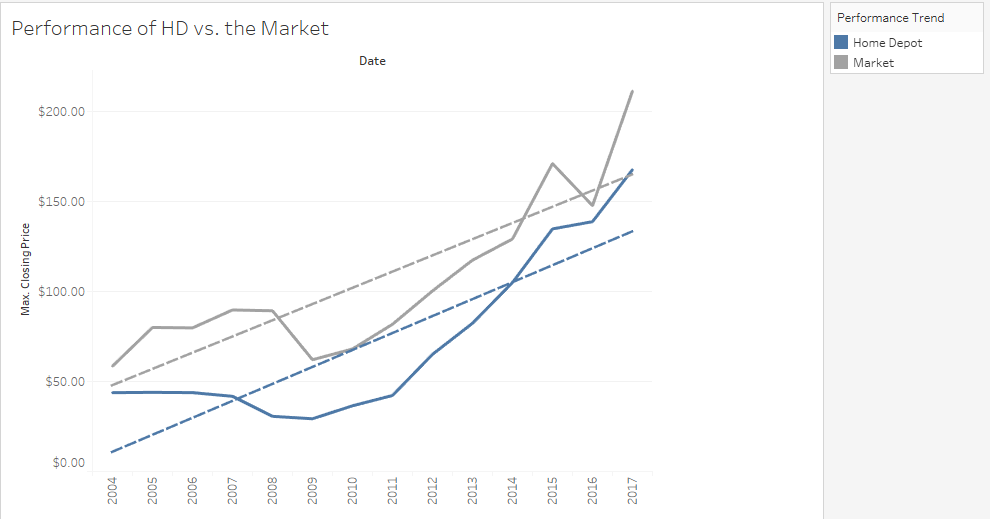

In [23]:
from IPython.display import Image
Image("LS7-2.png")

#### The above visualizations are redesigned and I have illustrated Home Depot as an example. It is clear that although the company is matching the performance pace i.e. growth rate of the market, it is evident from the visualization on the Home depot Data breach that the company was not punished for the act of breach. In fact, the stock prices were not even at the average of the period under consideration and the prices rose after the Data breach!!Similarly, the other trends and data breach incidents can be viewed in the Tableau Public dashboards.

#### I could certainly improve on these visualizations further by focusing on the industries to compare the breaches and check if there is a bias in punishment. 

#### There certainly need to be penalties for such incidents.